# ICC Men's Cricket World Cup India 2023 Analysis

This project explores ball-by-ball data from the 2023 Cricket World Cup to uncover exciting patterns and trends. From team strategies to player performances, we’ll turn raw data into meaningful cricket insights. 

<div style="text-align: center;">
    <img src="https://images.icc-cricket.com/image/upload/t_ratio21_9-size60/prd/us5fschyuqhdg7fpjb5e" alt="Cricket Image" width="700"/>
</div>


#### Importing all libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the dataset

In [8]:
df = pd.read_csv("world_cup_2023.csv")
df.shape

(26119, 22)

In [9]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Handling missing values

In [10]:
df.isnull().sum() # checking number of null values in each column

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     25454
noballs                   26063
byes                      26081
legbyes                   25926
penalty                   26118
wicket_type               25390
player_dismissed          25390
other_wicket_type         26119
other_player_dismissed    26119
dtype: int64

Columns like 'wides', 'noballs', 'byes', 'legbyes', and 'penalty' represent the extra runs a team scores when the ball bypasses the bat. If a batter hits the ball and scores a run, these columns naturally contain NaN values. To maintain clarity, I have replaced the NaN values with 0 because when the batter touches the ball, the extra runs are, of course, zero.


'NaN' values in 'wicket_type' and 'player_dismissed', indicates no dismissal. Hence, I have them with "None" for clarity and consistency.

In [11]:
df[['wides', 'noballs', 'byes', 'legbyes', 'penalty']] = df[['wides', 'noballs', 'byes', 'legbyes', 'penalty']].fillna(0)
df[['wicket_type', 'player_dismissed']] = df[['wicket_type', 'player_dismissed']].fillna('none')

The number of NaN values in the 'other_wicket_type' and 'other_player_dismissed' column is equal to the number of rows in the dataset. Hence, the entire column contains NaN values. These columns will have no relevance in our analysis so, I've dropped them. 

The dataset is of ICC Men's Cricket World Cup India 2023 so, the 'season' column is also of no use as it only has one value in all rows i.e. '2023/24' which is quite obvious. Thus, dropping it. 

In [12]:
columns_to_drop = ['other_wicket_type', 'other_player_dismissed', 'season']
df = df.drop(columns=columns_to_drop)

In [13]:
df.isnull().sum() # checking if all null values are still present in the dataset

match_id            0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
penalty             0
wicket_type         0
player_dismissed    0
dtype: int64

All 'NaN' values have been successfully handled, ensuring the dataset is clean and ready for analysis. Now, moving on to the next part of the project!

In [14]:
df.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,1,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0.0,none,none
1,1,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0.0,none,none
2,1,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,none,none
3,1,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,none,none
4,1,10/5/2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0.0,none,none


#### Data Type Conversion and Cleaning

Getting a basic overview of the entire dataset and checking the datatypes of each column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26119 entries, 0 to 26118
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          26119 non-null  int64  
 1   start_date        26119 non-null  object 
 2   venue             26119 non-null  object 
 3   innings           26119 non-null  int64  
 4   ball              26119 non-null  float64
 5   batting_team      26119 non-null  object 
 6   bowling_team      26119 non-null  object 
 7   striker           26119 non-null  object 
 8   non_striker       26119 non-null  object 
 9   bowler            26119 non-null  object 
 10  runs_off_bat      26119 non-null  int64  
 11  extras            26119 non-null  int64  
 12  wides             26119 non-null  float64
 13  noballs           26119 non-null  float64
 14  byes              26119 non-null  float64
 15  legbyes           26119 non-null  float64
 16  penalty           26119 non-null  float6

The datatype of 'start_date' is 'object'. Converting it into 'datetime64[ns]' for a smoother analysis. 

In [16]:
df['start_date'] = df['start_date'].astype('datetime64[ns]')

In [17]:
df.to_csv('world_cup_2023_cleaned.csv')

## Batting Analysis

### Top 10 Batters (by runs)

In [18]:
batsman_runs = df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).reset_index().head(10)
batsman_runs


,striker,runs_off_bat
0,V Kohli,765
1,RG Sharma,597
2,Q de Kock,594
3,R Ravindra,578
4,DJ Mitchell,552
5,DA Warner,535
6,SS Iyer,530
7,KL Rahul,452
8,HE van der Dussen,448
9,MR Marsh,441


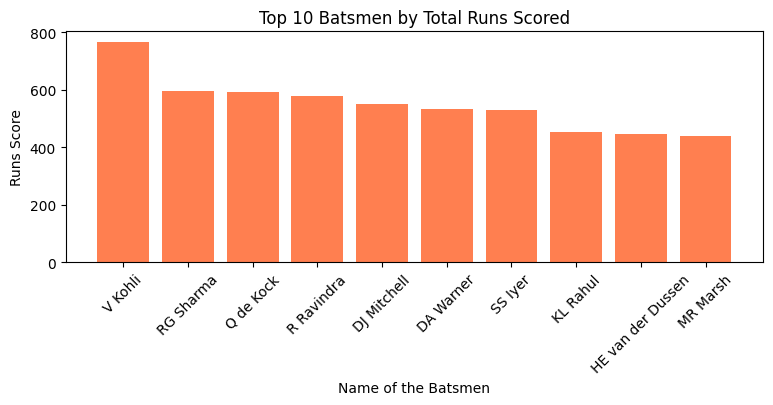

In [19]:
plt.figure(figsize=(9, 3))
plt.bar(batsman_runs['striker'], batsman_runs['runs_off_bat'], color = 'coral')  # Top 10 batsmen
plt.xlabel('Name of the Batsmen')
plt.ylabel('Runs Score')
plt.title('Top 10 Batsmen by Total Runs Scored')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

Observation: Virat Kohli was the leading run-scores in ICC CWC 2023.

#### Top 10 Batters (by S/R)

Batsman Strike Rate = Total Runs Scored/ Total Balls Faced 

creating a new table of batsman runs named 'br' as the previous one has sorted and indexed values. The previous table can't be used for calculation purposes. 

In [20]:
br = df.groupby('striker')['runs_off_bat'].sum()

calculating number of balls faced by each batsman

In [21]:
balls_faced = df.groupby('striker')['ball'].count()


calculated strike rate

In [22]:
strike_rate = (br/balls_faced)*100
top_strike_rates_df = strike_rate.sort_values(ascending=False).head(10).reset_index()
top_strike_rates_df = top_strike_rates_df.rename(columns={0: 'strike_rate'})
top_strike_rates_df

,striker,strike_rate
0,RJW Topley,177.777778
1,GJ Maxwell,147.601476
2,AAP Atkinson,142.307692
3,HH Pandya,137.500000
4,H Klaasen,129.965157
5,MA Wood,128.787879
6,Mujeeb Ur Rahman,127.500000
7,TM Head,126.053640
8,MJ Santner,125.609756
9,RG Sharma,123.092784


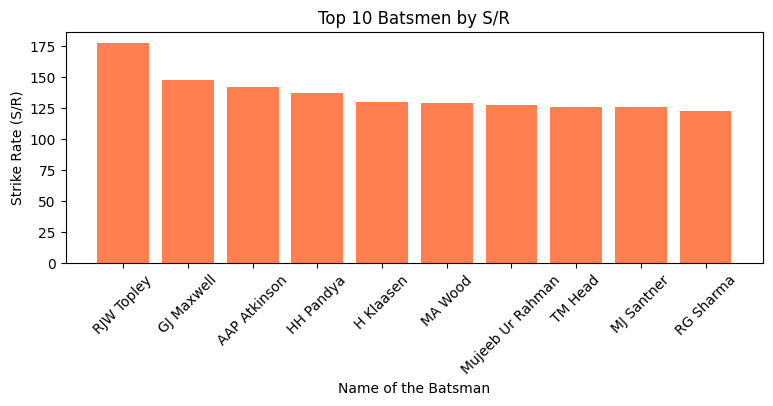

In [23]:
plt.figure(figsize=(9, 3))
plt.bar(top_strike_rates_df['striker'], top_strike_rates_df['strike_rate'], color = 'coral') 
plt.xlabel('Name of the Batsman')
plt.ylabel('Strike Rate (S/R)')
plt.title('Top 10 Batsmen by S/R')
plt.xticks(rotation=45)  
plt.show()

Observation: RJW Topely had the maximum strike rate of around 178 in the entire tournament

#### Top 10 Boundary Scorers

creating a subset of out dataset which contains only those records where a boundary has been hit.

In [24]:
boundaries = df[df['runs_off_bat'].isin([4,6])]

evaluating the top 10 boundary scorers in the tournament.

In [25]:
boundary_count = boundaries.groupby(['striker'])['runs_off_bat'].count()
top_batters_by_boundaries = boundary_count.sort_values(ascending=False).reset_index().head(10)
top_batters_by_boundaries = top_batters_by_boundaries.rename(columns={'runs_off_bat': 'boundary_count'})
top_batters_by_boundaries



,striker,boundary_count
0,RG Sharma,97
1,Q de Kock,78
2,V Kohli,77
3,DA Warner,74
4,R Ravindra,72
5,DJ Mitchell,70
6,MR Marsh,64
7,GJ Maxwell,62
8,SS Iyer,61
9,DJ Malan,59


plotting a graph

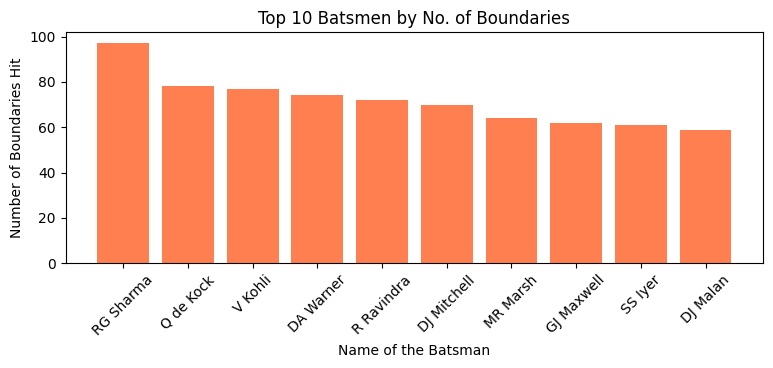

In [26]:
plt.figure(figsize=(9, 3))
plt.bar(top_batters_by_boundaries['striker'], top_batters_by_boundaries['boundary_count'], color = 'coral') 
plt.xlabel('Name of the Batsman')
plt.ylabel('Number of Boundaries Hit')
plt.title('Top 10 Batsmen by No. of Boundaries')
plt.xticks(rotation=45)  
plt.show()

Observation: Rohit Sharma hit the maximum boundaries (97) in CWC 2023.

#### Top 6 Hitters

creating a subset of out dataset which contains only those records where a 6 has been hit.

In [27]:
sixes = df[df['runs_off_bat'].isin([6])]

evaluating the top 10 six hitters in the tournament.

In [28]:
six_hitters = sixes.groupby(['striker'])['runs_off_bat'].count()
top_six_hitters = six_hitters.sort_values(ascending=False).reset_index().head(10)
top_six_hitters = top_six_hitters.rename(columns={'runs_off_bat': 'sixes_hit'})
top_six_hitters

,striker,sixes_hit
0,RG Sharma,31
1,SS Iyer,24
2,DA Warner,24
3,GJ Maxwell,22
4,DJ Mitchell,22
5,MR Marsh,21
6,Q de Kock,21
7,DA Miller,20
8,H Klaasen,19
9,Fakhar Zaman,18


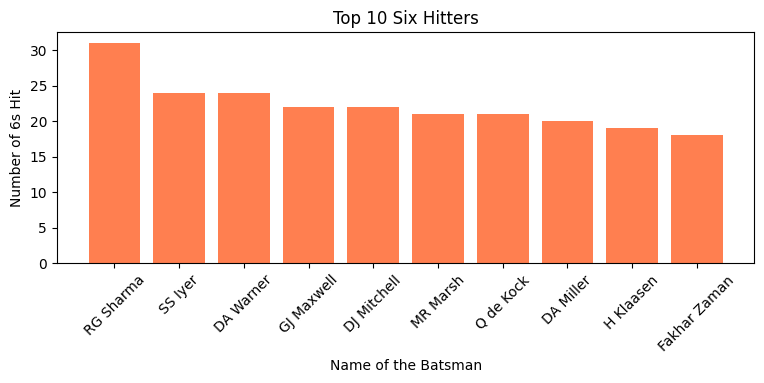

In [29]:
plt.figure(figsize=(9, 3))
plt.bar(top_six_hitters['striker'], top_six_hitters['sixes_hit'], color = 'coral') 
plt.xlabel('Name of the Batsman')
plt.ylabel('Number of 6s Hit')
plt.title('Top 10 Six Hitters')
plt.xticks(rotation=45)  
plt.show()

Observation: Rohit Sharma hit the maximum sixes (31) in CWC 2023.

#### Top 4 Smashers

creating a subset of out dataset which contains only those records where a 4 has been hit.

In [30]:
fours = df[df['runs_off_bat'].isin([4])]

evaluating the top 10 four smashers in the tournament.

In [31]:
four_smashers = fours.groupby(['striker'])['runs_off_bat'].count()
top_four_smashers = four_smashers.sort_values(ascending=False).reset_index().head(10)
top_four_smashers = top_four_smashers.rename(columns={'runs_off_bat': 'fours_hit'})
top_four_smashers

,striker,fours_hit
0,V Kohli,68
1,RG Sharma,66
2,Q de Kock,57
3,R Ravindra,55
4,DP Conway,54
5,DJ Malan,50
6,DA Warner,50
7,DJ Mitchell,48
8,AK Markram,44
9,P Nissanka,44


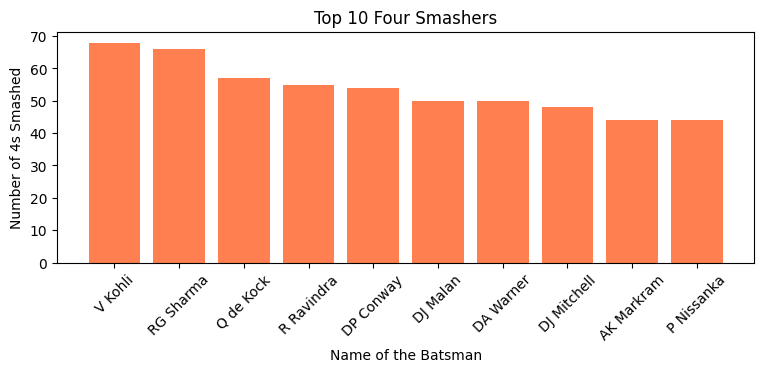

In [32]:
plt.figure(figsize=(9, 3))
plt.bar(top_four_smashers['striker'], top_four_smashers['fours_hit'], color = 'coral') 
plt.xlabel('Name of the Batsman')
plt.ylabel('Number of 4s Smashed')
plt.title('Top 10 Four Smashers')
plt.xticks(rotation=45)  
plt.show()

Observation: Virat Kohli hit the maximum fours (68) in CWC 2023.

#### 6s v/s 4s distribution

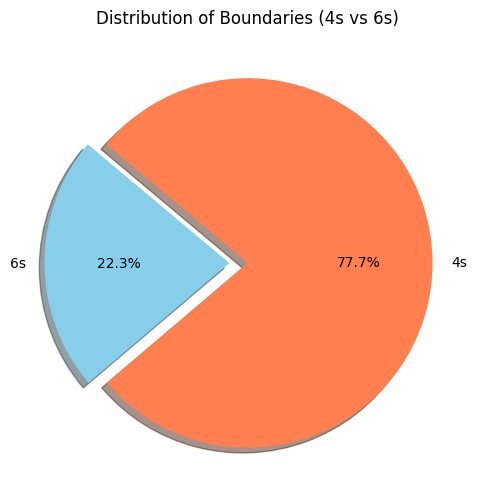

In [ ]:
sixes_count = sixes['runs_off_bat'].value_counts()
fours_count = fours['runs_off_bat'].value_counts()

labels = ['6s', '4s']
sizes = [sixes_count.get(6,0), fours_count.get(4,0)] 
colors = ['skyblue', 'coral'] 
explode = [0.1, 0]  

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)


plt.title('Distribution of Boundaries (4s vs 6s)')

plt.show()

In [34]:
print(sixes_count, fours_count)

runs_off_bat
6    644
Name: count, dtype: int64 runs_off_bat
4    2241
Name: count, dtype: int64


Observation: Out of the total boundaries, 22.3% runs came from 6s (total sixes: 644) and 77.7% runs came from 4s (total fours 2241).

#### Top 6 Hitting Venues

In [35]:
six_venues = sixes.groupby(['venue'])['runs_off_bat'].count()
top_six_hitting_venues = six_venues.sort_values(ascending=False).reset_index().head(10)
top_six_hitting_venues = top_six_hitting_venues.rename(columns={'runs_off_bat': 'sixes_hit'})
top_six_hitting_venues

,venue,sixes_hit
0,"Wankhede Stadium, Mumbai",106
1,"Arun Jaitley Stadium, Delhi",84
2,"M Chinnaswamy Stadium, Bengaluru",83
3,"Maharashtra Cricket Association Stadium, Pune",75
4,"Himachal Pradesh Cricket Association Stadium, ...",70
5,"MA Chidambaram Stadium, Chepauk, Chennai",60
6,"Narendra Modi Stadium, Ahmedabad",54
7,"Eden Gardens, Kolkata",50
8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",35
9,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,27


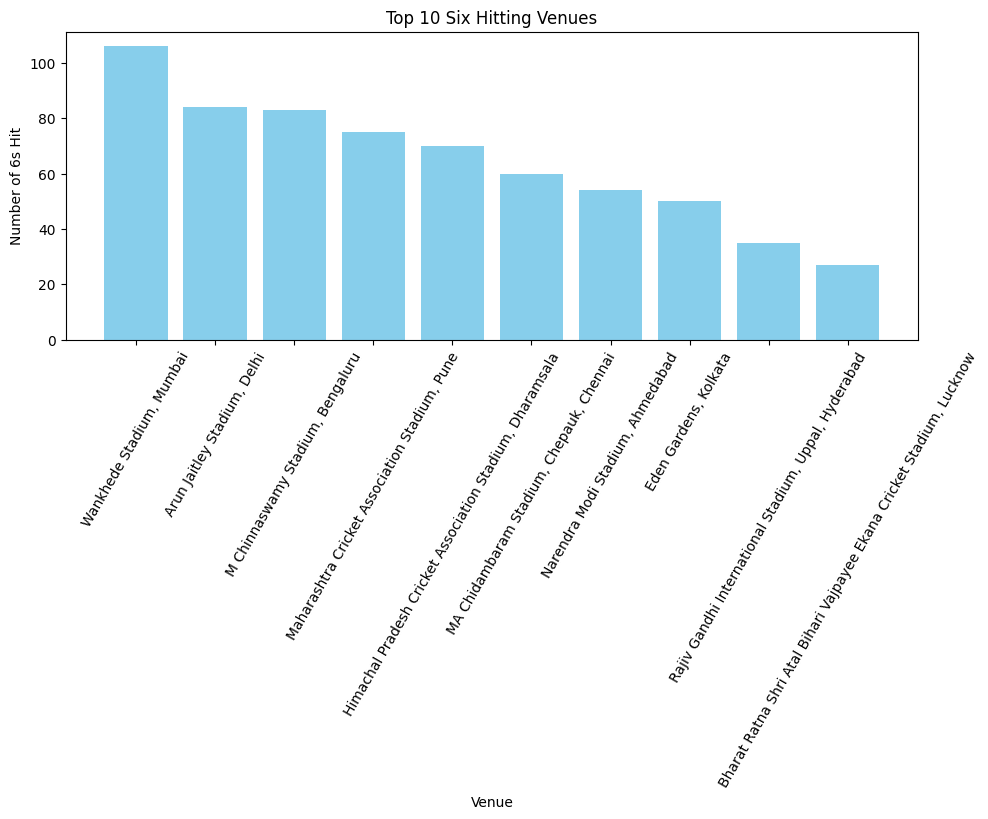

In [36]:
plt.figure(figsize=(11, 4))
plt.bar(top_six_hitting_venues['venue'], top_six_hitting_venues['sixes_hit'], color = 'skyblue') 
plt.xlabel('Venue')
plt.ylabel('Number of 6s Hit')
plt.title('Top 10 Six Hitting Venues')
plt.xticks(rotation=60)  
plt.show()

Observation: Wankhede Stadium, Mumbai recorded the maximum number of sixes in CWC 2023 (106)

#### Top 10 Individual Scores

In [37]:
total_runs_per_inning = df.groupby(['striker', 'match_id'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index()
total_runs_per_inning

,striker,match_id,runs_off_bat
0,GJ Maxwell,39,201
1,MR Marsh,43,177
2,Q de Kock,23,174
3,DA Warner,18,163
4,DP Conway,1,152
...,...,...,...
866,MR Marsh,5,0
867,Rahmanullah Gurbaz,30,0
868,GJ Maxwell,18,0
869,L Ngidi,37,0


The above dataframe will be usefull in future analysis, so making another one to analyze top 10 individual scores.

In [38]:
top_10_scores = total_runs_per_inning.head(10)
top_10_scores

,striker,match_id,runs_off_bat
0,GJ Maxwell,39,201
1,MR Marsh,43,177
2,Q de Kock,23,174
3,DA Warner,18,163
4,DP Conway,1,152
5,DJ Malan,7,140
6,TM Head,48,137
7,DJ Mitchell,46,134
8,HE van der Dussen,32,133
9,RG Sharma,9,131


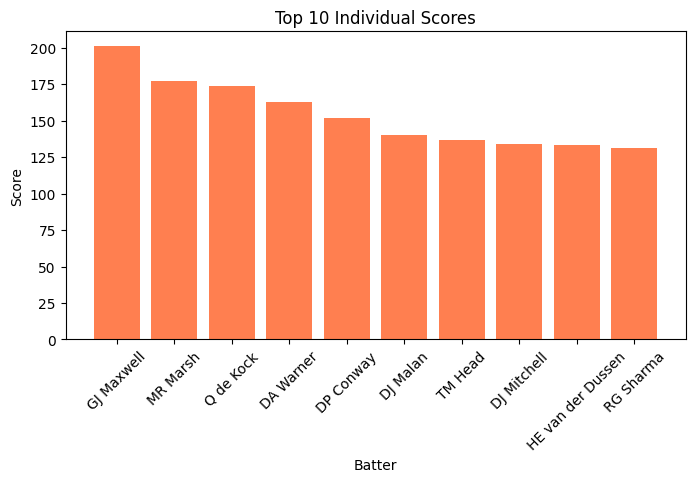

In [39]:
plt.figure(figsize=(8, 4))
plt.bar(top_10_scores['striker'],top_10_scores['runs_off_bat'], color = 'coral') 
plt.xlabel('Batter')
plt.ylabel('Score')
plt.title('Top 10 Individual Scores')
plt.xticks(rotation=45)  
plt.show()

Observation: Glen Maxwell recorded the maximum individual score (201) in CWC 2023. Despite being injured and unable to walk properly, he had pulled off a show that nobody would've imagined. Yes, I'm an analyst, but moments like these bring out the cricket enthusiast within ; )

#### Maximum Hundreds in CWC 2023

In [40]:
hundreds = total_runs_per_inning[total_runs_per_inning['runs_off_bat'] >= 100]
century_count_top_5 = hundreds.groupby(['striker'])['runs_off_bat'].count().sort_values(ascending=False).reset_index().head(10)
century_count_top_5 = century_count_top_5.rename(columns={'runs_off_bat': 'total_hundreds'})
century_count_top_5

,striker,total_hundreds
0,Q de Kock,4
1,V Kohli,3
2,R Ravindra,3
3,TM Head,2
4,SS Iyer,2
5,DA Warner,2
6,DJ Mitchell,2
7,GJ Maxwell,2
8,HE van der Dussen,2
9,MR Marsh,2


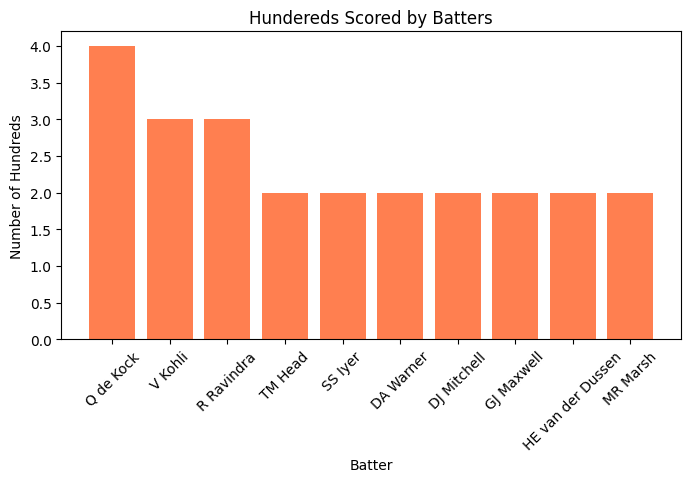

In [41]:
plt.figure(figsize=(8, 4))
plt.bar(century_count_top_5['striker'],century_count_top_5['total_hundreds'], color = 'coral') 
plt.xlabel('Batter')
plt.ylabel('Number of Hundreds')
plt.title('Hundereds Scored by Batters')
plt.xticks(rotation=45)  
plt.show()

Observation: Quinton De Kock scored the maximum hundreds in CWC 2023 i.e. 4. 

#### Maximum Half-Centuries in CWC 2023

In [42]:
half_centuries = total_runs_per_inning[(total_runs_per_inning['runs_off_bat'] >=50) & (total_runs_per_inning['runs_off_bat'] < 100)]
half_century_count_top_10 = half_centuries.groupby(['striker'])['runs_off_bat'].count().sort_values(ascending=False).reset_index().head(10)
half_century_count_top_10 = half_century_count_top_10.rename(columns={'runs_off_bat': 'total_fiftys'})
half_century_count_top_10

,striker,total_fiftys
0,V Kohli,6
1,Shubman Gill,4
2,P Nissanka,4
3,Babar Azam,4
4,AK Markram,3
5,Rahmat Shah,3
6,KS Williamson,3
7,M Labuschagne,3
8,Hashmatullah Shahidi,3
9,RG Sharma,3


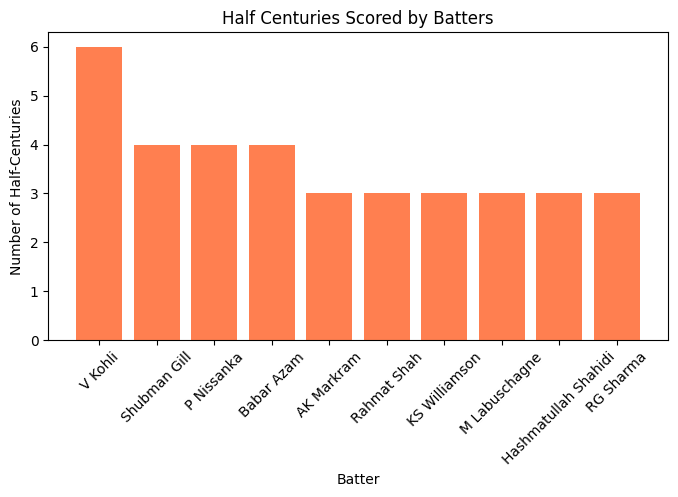

In [43]:
plt.figure(figsize=(8, 4))
plt.bar(half_century_count_top_10['striker'],half_century_count_top_10['total_fiftys'], color = 'coral') 
plt.xlabel('Batter')
plt.ylabel('Number of Half-Centuries')
plt.title('Half Centuries Scored by Batters')
plt.xticks(rotation=45)  
plt.show()

Observation: Virat Kohli scored the most number of 50s (7) in CWC 2023.

## Bowling Analysis

### Top 10 Bowlers (by number of wickets taken)

In [44]:
df['wicket_y_n'] = df['wicket_type'].apply(lambda x: 0 if x == 'none' else 1)

In [45]:
bowler_wickets = df.groupby('bowler')['wicket_y_n'].sum().sort_values(ascending=False)

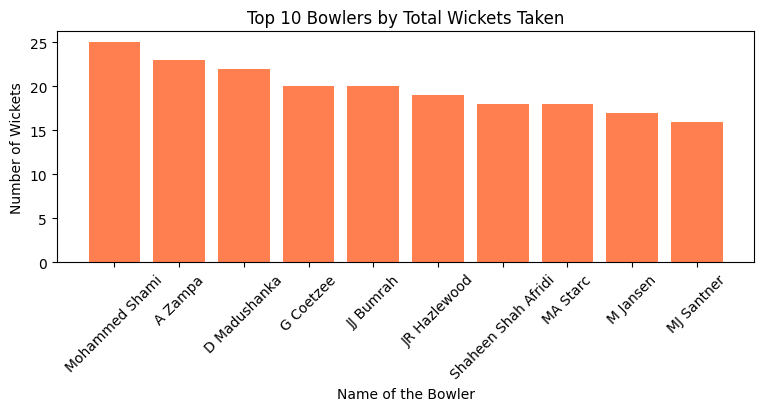

In [46]:
plt.figure(figsize=(9, 3))
plt.bar(bowler_wickets.index[:10], bowler_wickets.values[:10], color = 'coral')  # Top 10 batsmen
plt.xlabel('Name of the Bowler')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Bowlers by Total Wickets Taken')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

Observation: Mohammed Shami clinched the maximum wickets (25) in the tournament.

### Top 10 Bowlers (by bowling average)

Bowler Average: Total Runs Conceded / Total Wickets taken

In [72]:
df['bowler_runs'] = df['runs_off_bat'] + df['wides'] + df['noballs']

In [73]:
bowler_average = df.groupby(['bowler'])['bowler_runs'].sum() / df.groupby(['bowler'])['wicket_y_n'].sum()
bowler_average = bowler_average.reset_index(name='bowling_average')  
bowler_average = bowler_average.sort_values(by='bowling_average', ascending=True).reset_index().head(10)
bowler_average



,index,bowler,bowling_average
0,78,RG Sharma,7.000000
1,62,Mohammed Shami,10.280000
2,100,V Kohli,15.000000
3,82,SA Abbott,15.250000
4,3,AD Mathews,15.285714
5,33,JJ Bumrah,18.650000
6,61,Mohammad Wasim,19.545455
7,22,G Coetzee,19.800000
8,79,RJW Topley,20.333333
9,56,Mahedi Hasan,21.285714


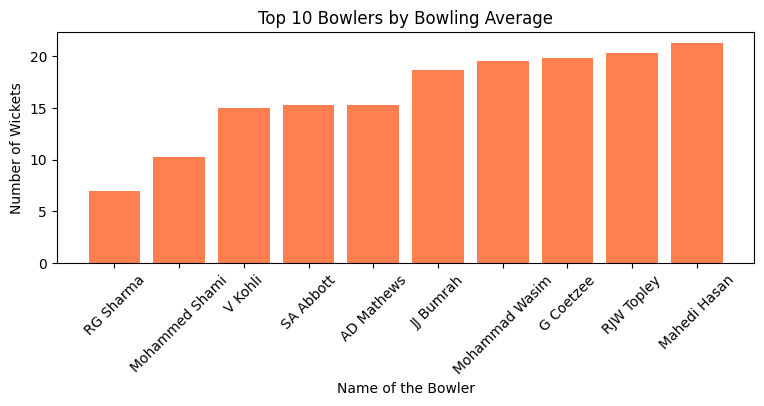

In [ ]:
plt.figure(figsize=(9, 3))
plt.bar(bowler_average['bowler'], bowler_average['bowling_average'], color = 'coral')  
plt.xlabel('Name of the Bowler')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Bowlers by Bowling Average')
plt.xticks(rotation=45)  
plt.show()

For people with not much cricket knowledge, the lesser the average of a bowler, the better he/she is considered.

Based on the above facts, Rohit Sharma ranks has the least average. But solely on this fact he cant be declared as the bowler with the best average (we all know that he is a full-time batter). We need to take the number of innings each bowler has bowled also into consideration to for accurate analysis.

MD Shami has the second least average and is a full-time bowler.

So, according to my analysis, MD SHAMI was the bowler with the least bowling average in CWC 2023.

### Top 10 Bowlers (Dot Balls Bowled)

In [ ]:
dot_balls = df[df['runs_off_bat'] == 0]
bowlers_dot_ball = dot_balls.groupby(['bowler'])['runs_off_bat'].count().sort_values(ascending=False).reset_index().head(10)
bowlers_dot_ball = bowlers_dot_ball.rename(columns={'runs_off_bat': 'total_dot_balls'})
bowlers_dot_ball


,bowler,total_dot_balls
0,JJ Bumrah,394
1,JR Hazlewood,347
2,TA Boult,335
3,KA Maharaj,329
4,MA Starc,328
5,RA Jadeja,317
6,Kuldeep Yadav,309
7,M Jansen,297
8,Mohammed Siraj,296
9,Shaheen Shah Afridi,295


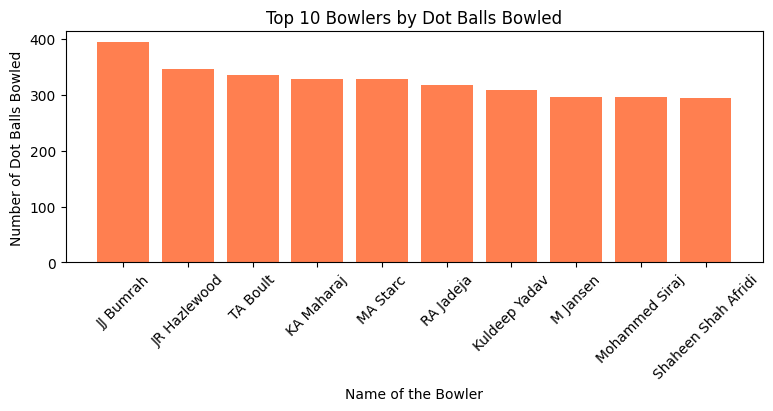

In [ ]:
plt.figure(figsize=(9, 3))
plt.bar(bowlers_dot_ball['bowler'], bowlers_dot_ball['total_dot_balls'], color = 'coral')  
plt.xlabel('Name of the Bowler')
plt.ylabel('Number of Dot Balls Bowled')
plt.title('Top 10 Bowlers by Dot Balls Bowled')
plt.xticks(rotation=45)  
plt.show()

As per the analysis, Jasprit Bumrah bowled the maximum dot balls in CWC 2023. 

### Most Number of Balls Bowled

In [ ]:
balls_bowled_all = df.groupby(['bowler'])['ball'].count().sort_values(ascending=False).reset_index().head(10)
balls_bowled_all = balls_bowled_all.rename(columns={'ball':'total_dot_balls'})
balls_bowled_all

,bowler,total_dot_balls
0,A Zampa,585
1,Kuldeep Yadav,575
2,JJ Bumrah,573
3,JR Hazlewood,572
4,TA Boult,565
5,RA Jadeja,565
6,MA Starc,563
7,MJ Santner,561
8,PJ Cummins,552
9,KA Maharaj,542


Based on above computation, Adam Zampa bowled the most number of balls in the tournament.

## Match-level Analysis

#### Venue Insights

Creating a pivot table to get the sums of total runs scored in 1st innings and 2nd innings at different venues. 

In [ ]:
pd1 = pd.pivot_table(df, values=['runs_off_bat', 'extras'], index= 'venue', columns='innings', aggfunc='sum')
pd1['1_total_score'] = pd1[('extras', 1)] + pd1[('runs_off_bat', 1)] 
pd1['2_total_score'] = pd1[('extras', 2)] + pd1[('runs_off_bat', 2)]
del pd1['extras']
del pd1['runs_off_bat']
pd1

,1_total_score,2_total_score
innings,,
venue,,
"Arun Jaitley Stadium, Delhi",1662,1186
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",1190,965
"Eden Gardens, Kolkata",1308,889
"Himachal Pradesh Cricket Association Stadium, Dharamsala",1426,1249
"M Chinnaswamy Stadium, Bengaluru",1505,1087
"MA Chidambaram Stadium, Chepauk, Chennai",1284,1145
"Maharashtra Cricket Association Stadium, Pune",1499,1156
"Narendra Modi Stadium, Ahmedabad",1243,1216


In [ ]:
pd2 = pd.pivot_table(df, values='match_id', index='venue', aggfunc='nunique')
pd2

,match_id
venue,
"Arun Jaitley Stadium, Delhi",5
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",5
"Eden Gardens, Kolkata",5
"Himachal Pradesh Cricket Association Stadium, Dharamsala",5
"M Chinnaswamy Stadium, Bengaluru",5
"MA Chidambaram Stadium, Chepauk, Chennai",5
"Maharashtra Cricket Association Stadium, Pune",5
"Narendra Modi Stadium, Ahmedabad",5
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",3


In [ ]:
pd1['average_1_innings_total'] = pd1['1_total_score']/pd2['match_id']
pd1['average_2_innings_total'] = pd1['2_total_score']/pd2['match_id']
pd1 = pd1.copy()
pd1

,1_total_score,2_total_score,average_1_innings_total,average_2_innings_total
innings,,,,
venue,,,,
"Arun Jaitley Stadium, Delhi",1662,1186,332.400000,237.200000
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",1190,965,238.000000,193.000000
"Eden Gardens, Kolkata",1308,889,261.600000,177.800000
"Himachal Pradesh Cricket Association Stadium, Dharamsala",1426,1249,285.200000,249.800000
"M Chinnaswamy Stadium, Bengaluru",1505,1087,301.000000,217.400000
"MA Chidambaram Stadium, Chepauk, Chennai",1284,1145,256.800000,229.000000
"Maharashtra Cricket Association Stadium, Pune",1499,1156,299.800000,231.200000
"Narendra Modi Stadium, Ahmedabad",1243,1216,248.600000,243.200000


Plotting a bar plot to compare the 1st innings total score and 2nd innings total score at each venue.

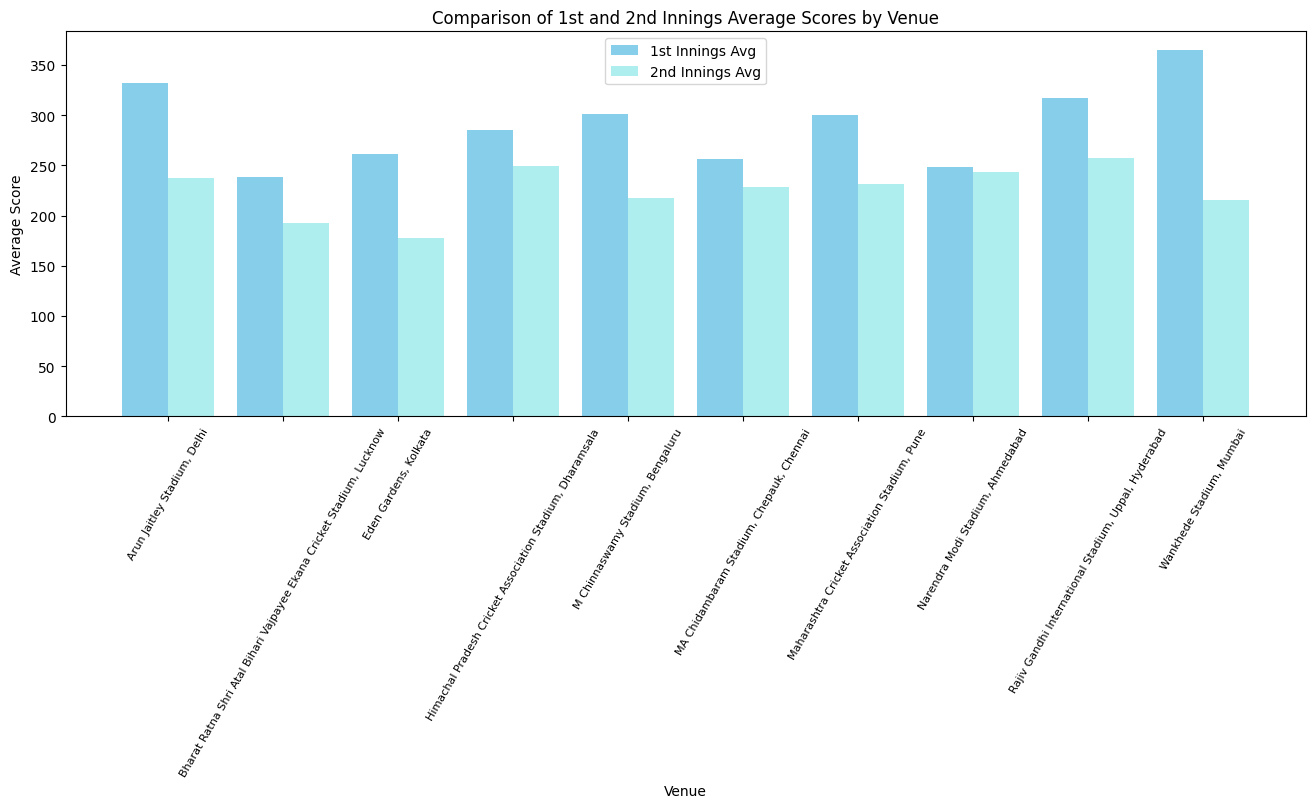

In [ ]:
plt.figure(figsize=(16, 5))
width = 0.4

venues= pd1.index
first_innings_avg = pd1['average_1_innings_total']
second_innings_avg = pd1['average_2_innings_total']

x = np.arange(len(venues))  # Numeric positions for venues
plt.bar(x - width/2, first_innings_avg, width=width, label='1st Innings Avg', color='skyblue')  # Shift left
plt.bar(x + width/2, second_innings_avg, width=width, label='2nd Innings Avg', color='paleturquoise')    # Shift right
plt.xticks(x, venues, rotation=60, fontsize= 8)  # Set venues as x-axis labels


plt.xlabel('Venue')
plt.ylabel('Average Score')
plt.title('Comparison of 1st and 2nd Innings Average Scores by Venue')  
plt.legend()
plt.show()

Observation: 


Average first and second innings total of each venue is calculated and shown in the above graph. These insights are crucial for predictive analytics. 

#### Team Performance Across Matches and Innings

Creating a column which contains total runs scored by a team on one ball. It is made for the ease of calculations and analysis in the future.

In [49]:
df['total_runs_on_each_ball'] = df['runs_off_bat'] + df['extras'] 

Making a table which has total score of each team in each innings of the tournament.

In [ ]:
total_match_scores = df.groupby(['batting_team', 'match_id'])['total_runs_on_each_ball'].sum().reset_index()
total_match_scores

,batting_team,match_id,total_runs_on_each_ball
0,Afghanistan,3,156
1,Afghanistan,9,272
2,Afghanistan,13,284
3,Afghanistan,16,139
4,Afghanistan,22,286
...,...,...,...
91,Sri Lanka,25,160
92,Sri Lanka,30,241
93,Sri Lanka,33,55
94,Sri Lanka,38,279


Using the above table to create a pivot table which has average score of each team.

In [ ]:
avg_match_scores = total_match_scores.groupby(['batting_team'])['total_runs_on_each_ball'].mean().reset_index()
pd3 = avg_match_scores.reset_index()
pd3.rename(columns= {'total_runs_on_each_ball': 'avg_score'})

,index,batting_team,avg_score
0,0,Afghanistan,232.777778
1,1,Australia,280.636364
2,2,Bangladesh,228.111111
3,3,England,249.444444
4,4,India,287.272727
5,5,Netherlands,206.888889
6,6,New Zealand,286.400000
7,7,Pakistan,258.666667
8,8,South Africa,289.700000
9,9,Sri Lanka,227.555556


Plotting a bar graph using the above information.

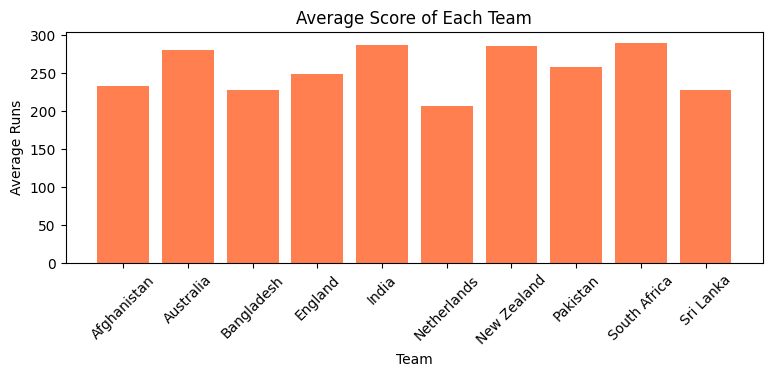

In [ ]:
plt.figure(figsize=(9, 3))
x = pd3['batting_team']
y = pd3['total_runs_on_each_ball']
plt.bar(x, y, color = 'coral')  
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.title('Average Score of Each Team')
plt.xticks(rotation=45)  
plt.show()

Observation: South Africa had the maximum average score of around 290. Sri Lanka on the other hand are at the bottom in the case with an average score of around 227 in CWC 2023.

South Africa had the maximum average score of around 290.

### Most Runs Scored In Which Over Phase?

creating a new column in the dataframe through the concept of binning in order to categorize the powerplay, middle, and death overs. 

In [56]:
bins = [0, 10, 20, 30, 40, 50] 
labels = ['Powerplay (1-10)', 'Middle Phase 1 (11-20)', 'Middle Phase 2 (21-30)', 'Middle Phase 3 (31-40)', 'Death Overs (41-50)']  
df['Phase'] = pd.cut(df['ball'], bins=bins, labels=labels, right=False)

In [ ]:
run_phase = df.groupby(['Phase'])['total_runs_on_each_ball'].sum().sort_values(ascending=False).reset_index()
run_phase = run_phase.rename(columns={'total_runs_on_each_ball': 'runs'})
run_phase

C:\Users\Dell\AppData\Local\Temp\ipykernel_19888\1684128043.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  run_phase = df.groupby(['Phase'])['total_runs_on_each_ball'].sum().sort_values(ascending=False).reset_index()


,Phase,runs
0,Powerplay (1-10),5308
1,Middle Phase 1 (11-20),5015
2,Middle Phase 2 (21-30),4962
3,Middle Phase 3 (31-40),4882
4,Death Overs (41-50),4472


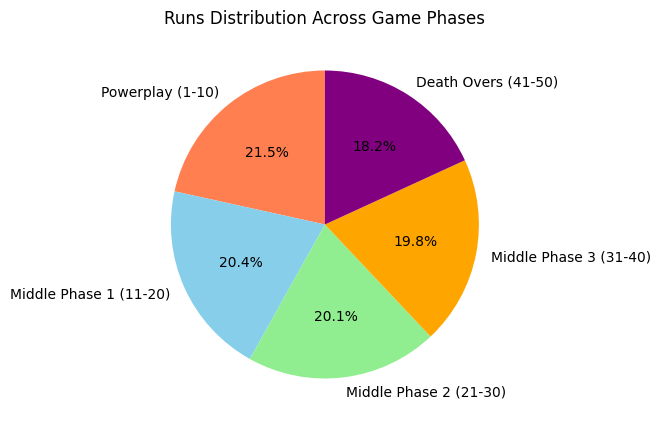

In [81]:
plt.figure(figsize=(5,5))  
plt.pie(run_phase['runs'], 
        labels=run_phase['Phase'], 
        autopct='%1.1f%%',  
        colors=['coral', 'skyblue', 'lightgreen', 'orange', 'purple'],
        startangle=90)

plt.title('Runs Distribution Across Game Phases')
plt.show()


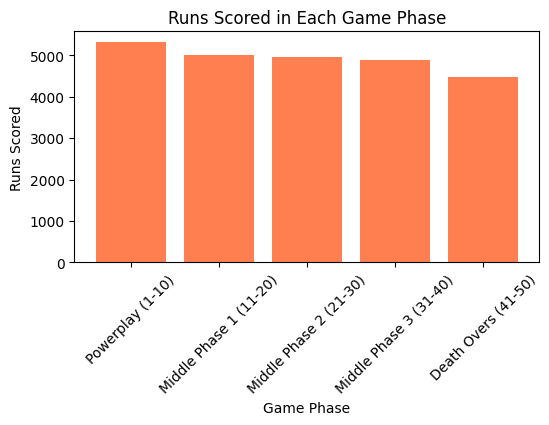

In [76]:
plt.figure(figsize=(6, 3))
plt.bar(run_phase['Phase'], run_phase['runs'], color = 'coral')  
plt.xlabel('Game Phase')
plt.ylabel('Runs Scored')
plt.title('Runs Scored in Each Game Phase')
plt.xticks(rotation=45)  
plt.show()

So, as per the analysis, most runs were scored in the POWERPLAY OVERS (1-10) in the entire CWC 2023. The least runs were however scored in the death overs phase. 

### Teams That Gave The Most Extras

In [60]:
extras = df.groupby(['bowling_team'])['extras'].sum().sort_values(ascending=False).reset_index()
extras

,bowling_team,extras
0,South Africa,190
1,Australia,163
2,Sri Lanka,147
3,Pakistan,134
4,India,132
5,Netherlands,120
6,Afghanistan,114
7,England,79
8,Bangladesh,67
9,New Zealand,66


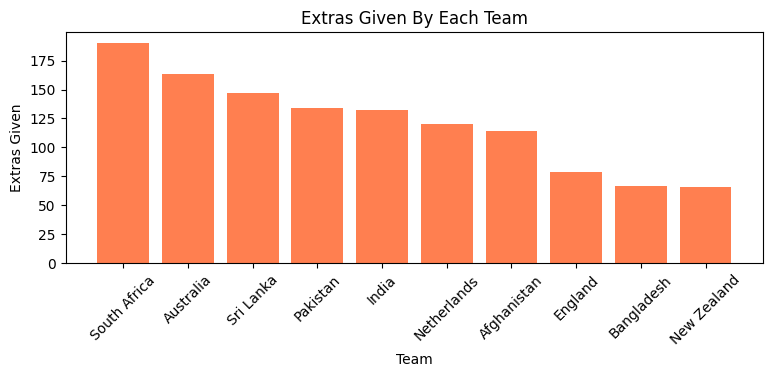

In [61]:
plt.figure(figsize=(9, 3))
plt.bar(extras['bowling_team'], extras['extras'], color = 'coral')  
plt.xlabel('Team')
plt.ylabel('Extras Given')
plt.title('Extras Given By Each Team')
plt.xticks(rotation=45)  
plt.show()

South Africa gave away the most extra runs in the entire tournament. Kiwis (New Zealand) on the other hand gave the least extras, no doubt that they've got a disciplined bowling attack along with an aggressive fielding unit.

### Dismissal Type Breakdown

In [70]:
dismissal_type = df.groupby('wicket_type')['wicket_y_n'].count().sort_values(ascending=False).reset_index()
dismissal_type = dismissal_type.drop(0) # skipping the 'none' values in the wicket_type column
dismissal_type = dismissal_type.rename(columns={'wicket_y_n':'total'})
dismissal_type

,wicket_type,total
1,caught,448
2,bowled,141
3,lbw,76
4,run out,38
5,caught and bowled,14
6,stumped,11
7,retired hurt,1


So, 'caught out' was the most frequent dismissal type in World Cup 2023